# Example from La Palma
- This notebook shows how to convert the Raman-based FI densities from Dayton et al. (2023) into pressures and depths in the crust
- This assumes +-50K in entrapment temperature, and an error in CO$_2$ density of 0.002925
- Depth is calculated using a 2-step density profile, with 2.8 g/cm3 above the Moho, and 3.1 g/cm3 below
- Get the data here!
- https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/Example5_FI_density_to_depth/Dayton_et_al_2023_LaPalma_Example.xlsx

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.57'

## Lets load in the data

In [17]:
data=pd.read_excel('Dayton_MI_FI_Decrep_Montecarlo_input.xlsx',
                   sheet_name='Sheet1')
data.head()

,SAMPLE,FileName (Files with _FI are from Dayton Sci. Adv),Density_g_cm3,Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Host_Fo_content,T_C
0,0,LM0 G20 I1,0.947659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150
1,0,LM0 G20 I10,0.915707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150
2,0,LM0 G20 I12,0.921483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150
3,0,LM0 G20 I2,0.901082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150
4,0,LM0 G20 I3,0.925438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150


- We can fisualize the range of meausured densities

Text(0, 0.5, '# of meas')

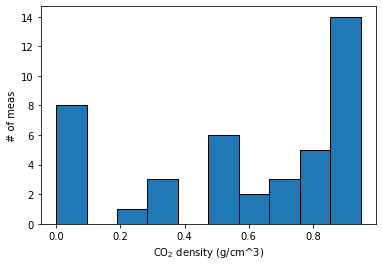

In [18]:
plt.hist(data['Density_g_cm3'], ec='k')
plt.xlabel('CO$_2$ density (g/cm^3)')
plt.ylabel('# of meas')

## Now lets propagate uncertainty in each fluid inclusion
- Here we use a temperature of 1150 K, with a +-50 K (i.e. an absolute uncertainty) distributed normally
- We say the error in CO2 density (from repeated Raman measurements) is 0.002925 g/cm3 (i.e. an absolute uncertainty) distributed normally 
- We want to use 2 step crustal density model, with 2800 kg/m3 above 14km depth, and 3100kg/m3 below

In [19]:
data['Density_g_cm3']

0     0.947659
1     0.915707
2     0.921483
3     0.901082
4     0.925438
5     0.937493
6     0.926373
7     0.927380
8     0.519607
9     0.478975
10    0.915484
11    0.919935
12    0.855757
13    0.866095
14    0.850259
15    0.861791
16    0.530632
17    0.489587
18    0.663438
19    0.487715
20    0.724630
21    0.663691
22    0.594364
23    0.000952
24    0.033137
25    0.025503
26    0.212425
27    0.038486
28    0.001025
29    0.033277
30    0.813806
31    0.836018
32    0.835248
33    0.798244
34    0.869970
35    0.514241
36    0.045820
37    0.724447
38    0.322377
39    0.347804
40    0.327543
41    0.000723
Name: Density_g_cm3, dtype: float64

working on sample number 0
working on sample number 20
working on sample number 40


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,LM0 G20 I1,0.947659,25.034117,7.201105,7.203172,7.192699,0.254611,25.040914,25.006474,0.837233,50,0.002925,0.0,1423.15,0.947659,two-step,None,SW96
1,LM0 G20 I10,0.915707,23.244187,6.656770,6.651611,6.651630,0.242471,23.227223,23.227287,0.797314,50,0.002925,0.0,1423.15,0.915707,two-step,None,SW96
2,LM0 G20 I12,0.921483,23.559444,6.752643,6.747800,6.746732,0.236508,23.543521,23.540007,0.777705,50,0.002925,0.0,1423.15,0.921483,two-step,None,SW96
3,LM0 G20 I2,0.901082,22.462063,6.418918,6.413511,6.420854,0.237277,22.444283,22.468428,0.780234,50,0.002925,0.0,1423.15,0.901082,two-step,None,SW96
4,LM0 G20 I3,0.925438,23.777376,6.818918,6.824841,6.822546,0.237826,23.796852,23.789307,0.782039,50,0.002925,0.0,1423.15,0.925438,two-step,None,SW96


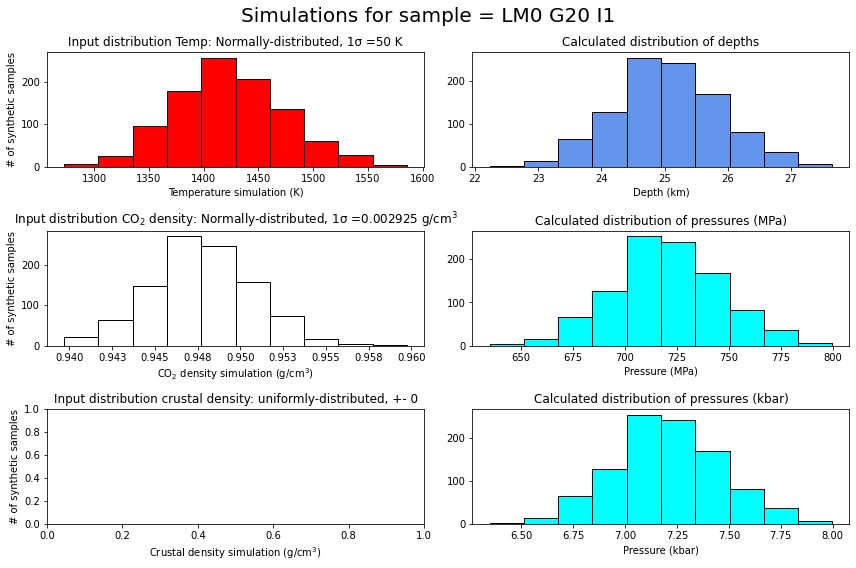

In [20]:
MC_Av, MC_All, fig=pf.propagate_FI_uncertainty(
T_K=1150+273.15,
error_T_K=50, 
error_type_T_K='Abs', 
error_dist_T_K='normal',
CO2_dens_gcm3=data['Density_g_cm3'],
error_CO2_dens=0.002925, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=data['FileName (Files with _FI are from Dayton Sci. Adv)'],
model='two-step', d1=14, rho1=2800, rho2=3100,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av.head()

In [23]:
MC_Av.head()
MC_Av.to_excel('Dayton_MI_FI_Decrep_Montecarlo_output_two_step.xlsx', index=False) 

In [24]:
MC_All.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,LM0 G20 I1,7.694645,769.464494,26.657015,None,two-step,1498.357201,0.954227
1,LM0 G20 I1,7.754548,775.454845,26.853995,None,two-step,1518.810794,0.951986
2,LM0 G20 I1,7.226061,722.606145,25.116180,None,two-step,1445.539464,0.942757
3,LM0 G20 I1,6.969247,696.924664,24.271700,None,two-step,1378.131882,0.947332
4,LM0 G20 I1,7.676076,767.607592,26.595955,None,two-step,1503.173568,0.951923


### Lets get a logical for each sample

In [25]:
sam0=data['SAMPLE']==0
sam1=data['SAMPLE']==2
sam4=data['SAMPLE']==4
sam6=data['SAMPLE']==6

## Lets plot each FI depth and its error bar, colored by sample (as in Dayton et al. 2023)

KeyError: 'Fo'

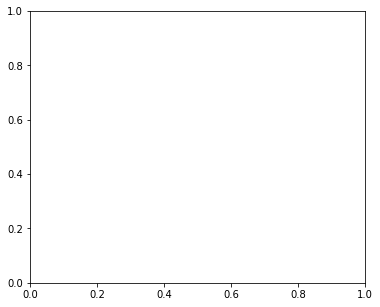

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax1.invert_yaxis()
ax2=ax1.twinx()
ax2.invert_yaxis()
# This sets the range of pressures you want
Plim1=3.8
Plim2=8.1
ax2.set_ylim([Plim2, Plim1])
# This calculates the corresponding depths for those pressures. 
D_Plim1=pf.convert_pressure_depth_2step(P_kbar=Plim1, d1=14, rho1=2800, rho2=3100, g=9.81)
D_Plim2=pf.convert_pressure_depth_2step(P_kbar=Plim2, d1=14, rho1=2800, rho2=3100, g=9.81)
ax1.set_ylim([D_Plim2, D_Plim1])
ax2.set_ylabel('Pressure (kbar)')

In [27]:
# Save results to excel
MC_Av.to_clipboard(excel=True)

## Complex double axis aligning
- The plot above was relatively easy, because we were always working below the density transition from layer 1 to layer 2
- What if we want to duplicate the axis spanning our multi-step profile?

## Lets use a linspace of pressure first

In [28]:
P_lin=np.linspace(0, 10, 11)
P_lin

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [29]:
D_lin=pf.convert_pressure_to_depth(P_kbar=P_lin, model='two-step', d1=14, rho1=2800, rho2=3100, g=9.81)

In [30]:
np.array(D_lin)

array([ 0.        ,  3.64059997,  7.28119994, 10.92179991, 14.50797409,
       17.79625793, 21.08454178, 24.37282562, 27.66110947, 30.94939331,
       34.23767716])

## Lets calculate depths for that linspace

KeyError: 'Fo'

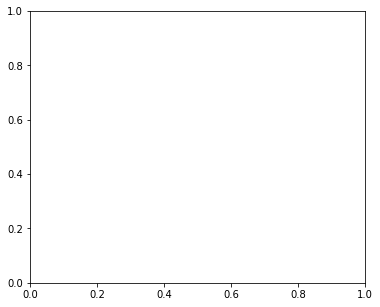

In [31]:
import matplotlib.ticker as ticker
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax2=ax1.twinx()



# First, get the limits right
ax1.set_ylim([np.max(D_lin), np.min(D_lin)])
ax2.set_ylim([np.max(P_lin), np.min(P_lin)])

# Now set the ticks - For Pressure, its easy, its the ticks we expected
ax2.set_yticks(P_lin)
# For depth, its more complex, as they wont be integers. 
ax1.set_yticks(D_lin)

ax2.set_ylabel('ax2 Pressure (kbar)')

KeyError: 'Fo'

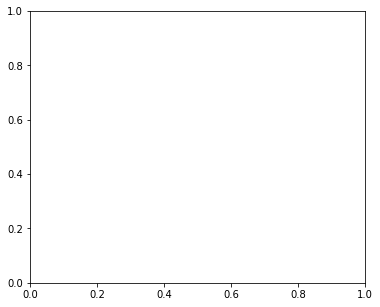

In [32]:
import matplotlib.ticker as ticker
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax2=ax1.twinx()



# First, get the limits right

ax2.set_ylim([np.max(P_lin), np.min(P_lin)])

# Now set the ticks - For Pressure, its easy, its the ticks we expected
#ax2.set_yticks(P_lin)
# For depth, its more complex, as they wont be integers. 
rounded_ticks = np.round(D_lin / 5) * 5

ax1.set_yticklabels(rounded_ticks)
ax1.set_yticks(rounded_ticks)
ax1.set_ylim([np.max(D_lin), np.min(D_lin)])


ax2.set_ylabel('ax2 Pressure (kbar)')